In [1]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx
# from node2vec import Node2Vec

df0 = pd.read_csv('train.csv',sep=',')
#df1 = pd.read_csv('test.csv',sep=',')

In [2]:
df = df0.sample(n=5000)

In [3]:
# Check for missing data
df.isna().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             8
satisfaction                         0
dtype: int64

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
62273,62273,112002,Female,Loyal Customer,18,Business travel,Eco Plus,770,3,5,...,3,1,1,3,4,4,3,56,47.0,neutral or dissatisfied
43485,43485,8698,Male,Loyal Customer,37,Business travel,Eco,280,2,4,...,2,5,5,1,1,4,2,0,0.0,satisfied
6622,6622,108587,Male,Loyal Customer,53,Business travel,Business,2149,4,3,...,4,4,4,4,4,4,3,0,0.0,satisfied
81236,81236,25261,Male,Loyal Customer,49,Business travel,Eco,425,5,1,...,5,3,1,5,5,5,5,0,0.0,satisfied
35211,35211,66534,Male,disloyal Customer,22,Business travel,Eco,333,3,2,...,3,1,3,3,2,4,3,0,0.0,neutral or dissatisfied


In [5]:
df.drop(columns=['Unnamed: 0','id'],inplace=True)

In [6]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
62273,Female,Loyal Customer,18,Business travel,Eco Plus,770,3,5,5,5,...,3,1,1,3,4,4,3,56,47.0,neutral or dissatisfied
43485,Male,Loyal Customer,37,Business travel,Eco,280,2,4,1,1,...,2,5,5,1,1,4,2,0,0.0,satisfied
6622,Male,Loyal Customer,53,Business travel,Business,2149,4,3,4,4,...,4,4,4,4,4,4,3,0,0.0,satisfied
81236,Male,Loyal Customer,49,Business travel,Eco,425,5,1,2,1,...,5,3,1,5,5,5,5,0,0.0,satisfied
35211,Male,disloyal Customer,22,Business travel,Eco,333,3,2,3,4,...,3,1,3,3,2,4,3,0,0.0,neutral or dissatisfied


In [7]:
df.satisfaction.unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [8]:
df.Gender = df.Gender.apply(lambda x: 0 if x == 'Male' else 1)
df['Customer Type'] = df['Customer Type'].apply(lambda x: 0 if x == 'Loyal Customer' else 1)
df['Type of Travel'] = df['Type of Travel'].apply(lambda x: 0 if x == 'Personal Travel' else 1)
df['Class'] = df['Class'].apply(lambda x: 0 if x == 'Eco' else(1 if x == 'Eco Plus' else 2))
df['satisfaction'] = df['satisfaction'].apply(lambda x: 0 if x == 'neutral or dissatisfied' else 1)

In [9]:
df.reset_index(drop=True,inplace=True)
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,18,1,1,770,3,5,5,5,...,3,1,1,3,4,4,3,56,47.0,0
1,0,0,37,1,0,280,2,4,1,1,...,2,5,5,1,1,4,2,0,0.0,1
2,0,0,53,1,2,2149,4,3,4,4,...,4,4,4,4,4,4,3,0,0.0,1
3,0,0,49,1,0,425,5,1,2,1,...,5,3,1,5,5,5,5,0,0.0,1
4,0,1,22,1,0,333,3,2,3,4,...,3,1,3,3,2,4,3,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,49,0,0,189,3,1,3,4,...,1,1,3,3,4,4,1,0,0.0,0
4996,1,0,37,1,0,102,3,4,3,4,...,3,3,2,2,3,2,3,0,6.0,0
4997,0,0,55,0,0,1999,4,4,4,1,...,5,5,4,5,5,4,5,4,0.0,1
4998,0,0,56,1,2,3980,4,4,4,4,...,4,4,4,4,5,4,3,8,9.0,1


In [10]:
df.drop(columns=['Arrival Delay in Minutes'],inplace = True)

In [11]:
# max number of graph generation features
np.log(len(df))

8.517193191416238

In [12]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,18,1,1,770,3,5,5,5,...,2,3,1,1,3,4,4,3,56,0
1,0,0,37,1,0,280,2,4,1,1,...,2,2,5,5,1,1,4,2,0,1
2,0,0,53,1,2,2149,4,3,4,4,...,5,4,4,4,4,4,4,3,0,1
3,0,0,49,1,0,425,5,1,2,1,...,5,5,3,1,5,5,5,5,0,1
4,0,1,22,1,0,333,3,2,3,4,...,3,3,1,3,3,2,4,3,0,0


In [13]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction'],
      dtype='object')

Following variables are used for the graph generation:

- Gender
- Customer Type
- Age
- Type of Travel
- Class

In [14]:
df.Age.describe()

count    5000.000000
mean       39.306000
std        15.024337
min         7.000000
25%        27.000000
50%        40.000000
75%        51.000000
max        85.000000
Name: Age, dtype: float64

In [15]:
X = df

In [16]:
X.Age = X.Age.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))

In [17]:
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,0,1,1,770,3,5,5,5,...,2,3,1,1,3,4,4,3,56,0
1,0,0,1,1,0,280,2,4,1,1,...,2,2,5,5,1,1,4,2,0,1
2,0,0,3,1,2,2149,4,3,4,4,...,5,4,4,4,4,4,4,3,0,1
3,0,0,2,1,0,425,5,1,2,1,...,5,5,3,1,5,5,5,5,0,1
4,0,1,0,1,0,333,3,2,3,4,...,3,3,1,3,3,2,4,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,2,0,0,189,3,1,3,4,...,1,1,1,3,3,4,4,1,0,0
4996,1,0,1,1,0,102,3,4,3,4,...,3,3,3,2,2,3,2,3,0,0
4997,0,0,3,0,0,1999,4,4,4,1,...,5,5,5,4,5,5,4,5,4,1
4998,0,0,3,1,2,3980,4,4,4,4,...,5,4,4,4,4,5,4,3,8,1


In [18]:
# gender
gend_alpha0 = 0.60
gend_beta1 = 0.40

aff_gend = np.array([[gend_alpha0,gend_beta1],
                     [gend_beta1,gend_alpha0]])

# customer type (loyal vs disoyal)

type_alpha0 = 0.8
type_beta1 = 0.5

aff_type = np.array([[type_alpha0, type_beta1],
                     [type_beta1, type_alpha0]])


# age
age_alpha0 = 0.90
age_beta1 = 0.80
age_beta2 = 0.60
age_beta3 = 0.40

aff_age = np.array([[age_alpha0,age_beta1,age_beta2,age_beta3],
                    [age_beta1,age_alpha0,age_beta1,age_beta2],
                    [age_beta2,age_beta1,age_alpha0,age_beta1],
                    [age_beta3,age_beta2,age_beta1,age_alpha0]])


# Type of travel
trav_type_alpha0 = 0.80
trav_type_beta1 = 0.40

aff_trav_type = np.array([[trav_type_alpha0, trav_type_beta1],
                          [trav_type_beta1, trav_type_alpha0]])

# Class

class_alpha0 = 0.85
class_beta1 = 0.60
class_beta2 = 0.40

aff_class = np.array([[class_alpha0, class_beta1, class_beta2],
                      [class_beta1, class_alpha0, class_beta1],
                      [class_beta2, class_beta1, class_alpha0]])


aff = {0:aff_gend, 1:aff_type, 2:aff_age, 3:aff_trav_type, 4:aff_class}


In [19]:
genvars = X[['Gender','Customer Type','Age','Type of Travel','Class']]

In [20]:
genvars

,Gender,Customer Type,Age,Type of Travel,Class
0,1,0,0,1,1
1,0,0,1,1,0
2,0,0,3,1,2
3,0,0,2,1,0
4,0,1,0,1,0
...,...,...,...,...,...
4995,0,0,2,0,0
4996,1,0,1,1,0
4997,0,0,3,0,0
4998,0,0,3,1,2


In [21]:
x = genvars.to_numpy()
x = x.astype(int)
x = x.T

P_u_v = np.empty((len(x.T),len(x.T)))
prob_u_v = np.empty((len(x),1))
u = np.empty((len(x),1))
v = np.empty((len(x),1))

# create probability for connection between u and v
for i in range(len(x.T)):
    u = x[:,i]

    for k in range(len(x.T)):
        v = x[:,k]

        for j in range(len(x)):
            aff_current = aff[j]
            prob_u_v[j] = aff_current[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v)

In [22]:
A = np.triu(P_u_v,0)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0


In [23]:
A = A + A.T - np.diag(np.diag(A))

In [24]:
G = nx.from_numpy_matrix(A)

In [25]:
nx.is_connected(G)

True

In [26]:
#nx.draw(G,node_size=20)

In [27]:
features = pd.Series(df.satisfaction) # invested or inv_pref

In [28]:
color_map = []
for i in features.items():
    if i[1] == 0:
        color_map.append('red')
    else:
        color_map.append('blue')

In [29]:
#pos = nx.spring_layout(G)

In [30]:
#nx.draw(G,pos,labels=features,node_size=20,node_color=color_map,with_labels=False)
#plt.show()

In [31]:
import dgl
import dgl.nn as dglnn
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler

G_dgl = dgl.from_networkx(G)
feat = df.drop(columns=['satisfaction'])
feat = pd.get_dummies(feat)
scale = StandardScaler()
feat = pd.DataFrame(scale.fit_transform(feat))

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl.ndata['feat'] =  embedding
G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.2)
G_dgl.ndata['label'] = torch.tensor(features)

Using backend: pytorch


In [32]:
G_dgl.ndata['val_mask'] = torch.empty(len(G_dgl.nodes()))
for i in range(len(G_dgl.ndata['train_mask'])):
    if G_dgl.ndata['train_mask'][i] == True:
        G_dgl.ndata['val_mask'][i] = False
    else:
        G_dgl.ndata['val_mask'][i] = True

G_dgl.ndata['val_mask'] = G_dgl.ndata['val_mask'].type(torch.bool)

In [33]:
# Contruct a two-layer GNN model

class GAT(nn.Module):
    def __init__(self, in_feats, hid_feats, out_feats):
        super().__init__()
        self.conv1 = dglnn.pytorch.conv.GATConv(
            in_feats=in_feats, out_feats=hid_feats, num_heads=1)
        self.conv2 = dglnn.pytorch.conv.GATConv(
            in_feats=hid_feats, out_feats=out_feats, num_heads=1)

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.relu(h)
        h = self.conv2(graph, h)
        h = F.log_softmax(h,1)
        return h

In [34]:
def evaluate(model, graph, features, labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        logits = logits.reshape(len(node_features),n_labels)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [35]:
node_features = G_dgl.ndata['feat']
node_labels = G_dgl.ndata['label']
train_mask = G_dgl.ndata['train_mask']
valid_mask = G_dgl.ndata['val_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [36]:
model = GAT(in_feats=n_features, hid_feats=100, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
plot_loss_train = []
plot_loss_val = []
valid_acc = []
train_acc = []
dur = []
for epoch in range(100):
    t0 = time.time()
    model.train()
    # forward propagation by using all nodes
    logits = model(G_dgl, node_features)
    logits = logits.reshape(len(node_features),n_labels)
    # compute loss
    loss_train = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    loss_val = F.cross_entropy(logits[valid_mask], node_labels[valid_mask])
    plot_loss_train.append(loss_train.item())
    plot_loss_val.append(loss_val.item())
    # compute validation accuracy
    acc_val = evaluate(model, G_dgl, node_features, node_labels, valid_mask)
    acc_train = evaluate(model, G_dgl, node_features, node_labels, train_mask)
    valid_acc.append(acc_val)
    train_acc.append(acc_train)
    # backward propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    dur.append(time.time() - t0)
    if epoch % 10 == 0:
        print('Epoch: {}, train loss: {:.4f}, validation loss: {:.4f}, training accuracy: {:.4f}, validation accuracy: {:.4f}, Time: {:.4f}'.format(epoch,loss_train.item(),loss_val.item(),acc_train,acc_val,np.mean(dur)))



Epoch: 0, train loss: 0.6932, validation loss: 0.6931, training accuracy: 0.5679, validation accuracy: 0.5635, Time: 4.5502
Epoch: 10, train loss: 0.6932, validation loss: 0.6931, training accuracy: 0.5679, validation accuracy: 0.5635, Time: 3.5981
Epoch: 20, train loss: 0.6932, validation loss: 0.6931, training accuracy: 0.5679, validation accuracy: 0.5635, Time: 3.8696
Epoch: 30, train loss: 0.6932, validation loss: 0.6931, training accuracy: 0.5679, validation accuracy: 0.5635, Time: 4.1567
Epoch: 40, train loss: 0.6932, validation loss: 0.6931, training accuracy: 0.5679, validation accuracy: 0.5635, Time: 4.2788
Epoch: 50, train loss: 0.6932, validation loss: 0.6931, training accuracy: 0.5679, validation accuracy: 0.5635, Time: 4.2075
Epoch: 60, train loss: 0.6932, validation loss: 0.6931, training accuracy: 0.5679, validation accuracy: 0.5635, Time: 4.2505
Epoch: 70, train loss: 0.6932, validation loss: 0.6931, training accuracy: 0.5679, validation accuracy: 0.5635, Time: 4.3069
E

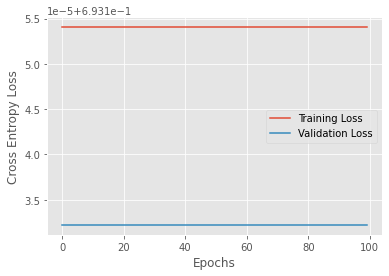

In [37]:
plt.plot(plot_loss_train,label='Training Loss')
plt.plot(plot_loss_val,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

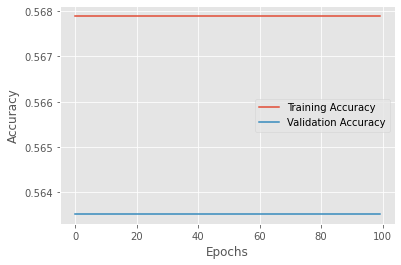

In [38]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(valid_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
val_tens = torch.tensor(features)
_, indices_val = torch.max(logits[valid_mask], dim=1)
val_lab = val_tens[valid_mask]
train_lab = val_tens[train_mask]
_, indices_train = torch.max(logits[train_mask], dim=1)

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(train_lab,indices_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(train_lab,indices_train))


Classification Accuracy validation set 0.5635179153094463
-------------------------------------------------------------
Classification Accuracy training set 0.5678889990089198
-------------------------------------------------------------
Confusion Matrix validation set:
[[2249    0]
 [1742    0]]
-------------------------------------------------------------
Confusion Matrix training set:
[[573   0]
 [436   0]]


In [40]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

roc_auc_score(val_lab,indices_val)

0.5

In [41]:
#from node2vec import Node2Vec

#node2vec = Node2Vec(G, dimensions=30, walk_length=20, num_walks=100, workers=1)
#model = node2vec.fit(window=5, min_count=1, batch_words=2)
#model.wv.save_word2vec_format('embeddings')

In [42]:
#t = pd.read_csv('embeddings', delimiter = " ", index_col=0, header = None)
#t.sort_index(inplace=True)
#t = t.to_numpy()
#t.shape

In [43]:
#import statsmodels.api as sm

#log_reg = sm.Logit(features, t).fit()

In [44]:
from sklearn.model_selection import train_test_split
f = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(feat,f, test_size = 0.8, shuffle=True)

In [45]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=50, batch_size=5)

Epoch 1/50
200/200 [==============================] - 4s 15ms/step - loss: 0.8060 - accuracy: 0.4603 - val_loss: 0.6287 - val_accuracy: 0.7470
Epoch 2/50
200/200 [==============================] - 2s 11ms/step - loss: 0.5989 - accuracy: 0.7489 - val_loss: 0.4605 - val_accuracy: 0.8385
Epoch 3/50
200/200 [==============================] - 2s 12ms/step - loss: 0.4250 - accuracy: 0.8599 - val_loss: 0.3540 - val_accuracy: 0.8612
Epoch 4/50
200/200 [==============================] - 2s 9ms/step - loss: 0.3551 - accuracy: 0.8678 - val_loss: 0.3230 - val_accuracy: 0.8733
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 0.3007 - accuracy: 0.8908 - val_loss: 0.3069 - val_accuracy: 0.8802
Epoch 6/50
200/200 [==============================] - 1s 6ms/step - loss: 0.2906 - accuracy: 0.9022 - val_loss: 0.2983 - val_accuracy: 0.8882
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 0.2421 - accuracy: 0.9170 - val_loss: 0.2911 - val_accuracy: 0.8932
Epo

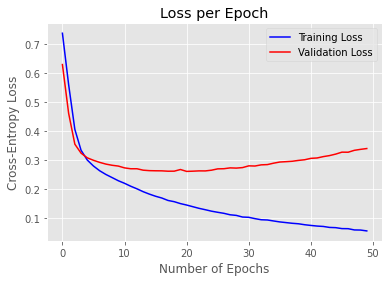

In [46]:
plt.plot(history.history['loss'],label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'],label = 'Validation Loss', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

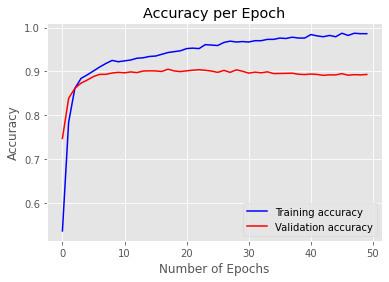

In [47]:
plt.plot(history.history['accuracy'],label = 'Training accuracy', color = 'blue')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.show()

In [48]:
df_test = pd.read_csv('test.csv',sep=',')
df_test = df_test.sample(n=5000)
df_test.drop(columns=['Unnamed: 0','id'],inplace=True)
df_test.Gender = df_test.Gender.apply(lambda x: 0 if x == 'Male' else 1)
df_test['Customer Type'] = df_test['Customer Type'].apply(lambda x: 0 if x == 'Loyal Customer' else 1)
df_test['Type of Travel'] = df_test['Type of Travel'].apply(lambda x: 0 if x == 'Personal Travel' else 1)
df_test['Class'] = df_test['Class'].apply(lambda x: 0 if x == 'Eco' else(1 if x == 'Eco Plus' else 2))
df_test['satisfaction'] = df_test['satisfaction'].apply(lambda x: 0 if x == 'neutral or dissatisfied' else 1)
df_test.reset_index(drop=True,inplace=True)
df_test.drop(columns=['Arrival Delay in Minutes'],inplace = True)


In [49]:
X = df_test
X.Age = X.Age.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))
genvars = X[['Gender','Customer Type','Age','Type of Travel','Class']]

In [50]:
genvars

,Gender,Customer Type,Age,Type of Travel,Class
0,1,0,2,1,0
1,1,0,1,0,0
2,0,0,0,0,0
3,1,0,2,1,2
4,1,0,0,0,0
...,...,...,...,...,...
4995,0,0,1,1,2
4996,1,0,3,0,0
4997,0,0,0,0,0
4998,0,0,2,1,2


In [51]:
x = genvars.to_numpy()
x = x.astype(int)
x = x.T

P_u_v = np.empty((len(x.T),len(x.T)))
prob_u_v = np.empty((len(x),1))
u = np.empty((len(x),1))
v = np.empty((len(x),1))

# create probability for connection between u and v
for i in range(len(x.T)):
    u = x[:,i]

    for k in range(len(x.T)):
        v = x[:,k]

        for j in range(len(x)):
            aff_current = aff[j]
            prob_u_v[j] = aff_current[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v)

In [52]:
A = np.triu(P_u_v,0)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0


In [53]:
A = A + A.T - np.diag(np.diag(A))

In [54]:
G_test = nx.from_numpy_matrix(A)

In [55]:
features = pd.Series(df_test.satisfaction) # invested or inv_pref

In [56]:
G_dgl_test = dgl.from_networkx(G_test)
feat = df_test.drop(columns=['satisfaction'])
feat = pd.get_dummies(feat)
scale = StandardScaler()
feat = pd.DataFrame(scale.fit_transform(feat))

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl_test.ndata['feat'] =  embedding
#G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.2)
G_dgl_test.ndata['label'] = torch.tensor(features)

In [57]:
node_features = G_dgl_test.ndata['feat']
node_labels = G_dgl_test.ndata['label']
#train_mask = G_dgl.ndata['train_mask']
#valid_mask = G_dgl.ndata['val_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [58]:
def evaluate(model, graph, features, labels):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        logits = logits.reshape(len(node_features),n_labels)
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [59]:
model = GAT(in_feats=n_features, hid_feats=50, out_feats=n_labels)
model.eval()
logits = model(G_dgl_test, node_features)
logits = logits.reshape(len(node_features),n_labels)
loss = F.cross_entropy(logits, node_labels)
acc = evaluate(model, G_dgl_test, node_features, node_labels)


In [60]:
acc

0.5612

In [61]:
val_tens = torch.tensor(features)
_, indices_val = torch.max(logits, dim=1)
val_lab = val_tens

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))


Classification Accuracy validation set 0.5612
-------------------------------------------------------------
Confusion Matrix validation set:
[[2806    0]
 [2194    0]]
